In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import scienceplots

plt.style.use('science')

import sqlite3

import struct

import random


In [2]:
db_name = "Main.db"

con = sqlite3.connect(db_name, check_same_thread=False)
cur = con.cursor()

In [3]:
def unpack_float(i_bytes):
    num_floats = len(i_bytes) // 8
    return struct.unpack(f'{num_floats}d', i_bytes)


def unpack_int(i_bytes):
    return int.from_bytes(i_bytes)

(1, 13, 15349079.231443219, 60.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 38, 14499949.879163638, 120.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 63, 13606969.271600379, 180.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 88, 12828834.713527223, 240.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 113, 1219

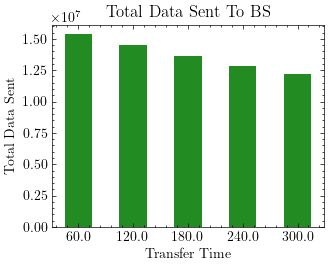

In [21]:
query = f"""SELECT sensornode.problemid, sensornode.simulatorid, sum(totaldatasent), simulator.transfertime, simulatortype FROM SensorNode inner join simulator on sensornode.simulatorid = simulator.simulatorid 
                    where simulator.transmissionrange = 100 and simulator.interferencerange = 200 and sensornode.problemid = 1 and simulator.simulatortype like 'Default%'
                    group by sensornode.problemid, sensornode.simulatorid
                    order by transfertime"""

x_axis = []
y = []
for row in cur.execute(query):
    print(row)
    y += [row[2]]
    x_axis += [row[3]]

fig, ax = plt.subplots()

x = np.arange(len(y))  # the label locations
width = 0.5  # the width of the bars

rects = ax.bar(x + width, y, width, color='forestgreen')
#ax.bar_label(rects, padding=3)

ax.set_ylabel("Total Data Sent")
ax.set_xlabel("Transfer Time")
ax.set_title("Total Data Sent To BS")
ax.set_xticks(x + width, x_axis)
#ax.legend(bbox_to_anchor=(1.1, 1.05))

fig.savefig(f"Images/Data-TransferTime.png", dpi=600)
#plt.close()

(1, 13, 30689584082.322712, 60.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 38, 31047196940.018116, 120.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 63, 31041889145.871563, 180.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 88, 31124615508.9363, 240.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 113, 312883

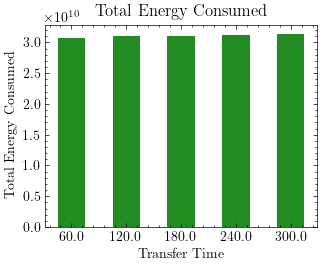

In [22]:
query = f"""SELECT sensornode.problemid, sensornode.simulatorid, sum(energyconsumed), simulator.transfertime, simulatortype FROM SensorNode inner join simulator on sensornode.simulatorid = simulator.simulatorid 
                    where simulator.transmissionrange = 100 and simulator.interferencerange = 200 and sensornode.problemid = 1 and simulator.simulatortype like 'Default%'
                    group by sensornode.problemid, sensornode.simulatorid
                    order by transfertime"""

x_axis = []
y = []
for row in cur.execute(query):
    print(row)
    y += [row[2]]
    x_axis += [row[3]]

fig, ax = plt.subplots()

x = np.arange(len(y))  # the label locations
width = 0.5  # the width of the bars

rects = ax.bar(x + width, y, width, color='forestgreen')
#ax.bar_label(rects, padding=3)

ax.set_ylabel("Total Energy Consumed")
ax.set_xlabel("Transfer Time")
ax.set_title("Total Energy Consumed")
ax.set_xticks(x + width, x_axis)
#ax.legend(bbox_to_anchor=(1.1, 1.05))

fig.savefig(f"Images/Energy-TransferTime.png", dpi=600)
#plt.close()

(1, 36, 14774736.681666786, 100.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 37, 14736364.728479547, 150.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 38, 14499949.879163638, 200.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 39, 14186924.747012883, 250.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 40, 1375

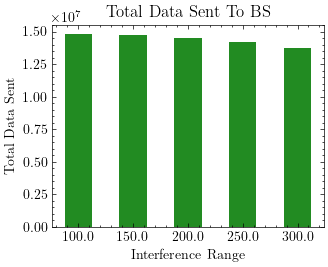

In [23]:
query = f"""SELECT sensornode.problemid, sensornode.simulatorid, sum(totaldatasent), simulator.interferencerange, simulatortype FROM SensorNode inner join simulator on sensornode.simulatorid = simulator.simulatorid 
                    where simulator.transmissionrange = 100 and simulator.transfertime = 120 and sensornode.problemid = 1 and simulator.simulatortype like 'Default%'
                    group by sensornode.problemid, sensornode.simulatorid
                    order by interferencerange"""

x_axis = []
y = []
for row in cur.execute(query):
    print(row)
    y += [row[2]]
    x_axis += [row[3]]

fig, ax = plt.subplots()

x = np.arange(len(y))  # the label locations
width = 0.5  # the width of the bars

rects = ax.bar(x + width, y, width, color='forestgreen')
#ax.bar_label(rects, padding=3)

ax.set_ylabel("Total Data Sent")
ax.set_xlabel("Interference Range")
ax.set_title("Total Data Sent To BS")
ax.set_xticks(x + width, x_axis)
#ax.legend(bbox_to_anchor=(1.1, 1.05))

fig.savefig(f"Images/Data-InterferenceRange.png", dpi=600)
#plt.close()

(1, 36, 64036267151.03056, 100.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 37, 41976313415.56629, 150.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 38, 31047196940.018116, 200.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 39, 23027501993.764984, 250.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 40, 197443

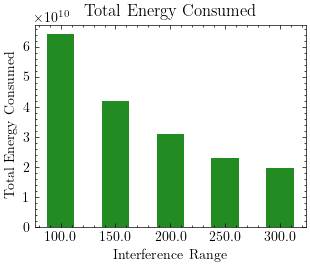

In [24]:
query = f"""SELECT sensornode.problemid, sensornode.simulatorid, sum(energyconsumed), simulator.interferencerange, simulatortype FROM SensorNode inner join simulator on sensornode.simulatorid = simulator.simulatorid 
                    where simulator.transmissionrange = 100 and simulator.transfertime = 120 and sensornode.problemid = 1 and simulator.simulatortype like 'Default%'
                    group by sensornode.problemid, sensornode.simulatorid
                    order by interferencerange"""

x_axis = []
y = []
for row in cur.execute(query):
    print(row)
    y += [row[2]]
    x_axis += [row[3]]

fig, ax = plt.subplots()

x = np.arange(len(y))  # the label locations
width = 0.5  # the width of the bars

rects = ax.bar(x + width, y, width, color='forestgreen')
#ax.bar_label(rects, padding=3)

ax.set_ylabel("Total Energy Consumed")
ax.set_xlabel("Interference Range")
ax.set_title("Total Energy Consumed")
ax.set_xticks(x + width, x_axis)
#ax.legend(bbox_to_anchor=(1.1, 1.05))

fig.savefig(f"Images/Energy-InterferenceRange.png", dpi=600)
#plt.close()

(1, 28, 3082324.371930918, 50.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 33, 11388522.382158061, 75.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 38, 14499949.879163638, 100.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 43, 15099035.84013068, 125.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 48, 15340809

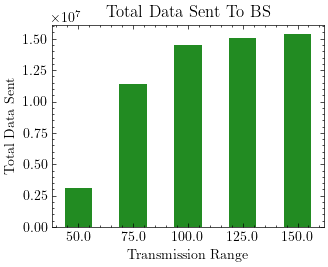

In [25]:
query = f"""SELECT sensornode.problemid, sensornode.simulatorid, sum(totaldatasent), simulator.transmissionrange, simulatortype FROM SensorNode inner join simulator on sensornode.simulatorid = simulator.simulatorid 
                    where simulator.interferencerange = 200 and simulator.transfertime = 120 and sensornode.problemid = 1 and simulator.simulatortype like 'Default%'
                    group by sensornode.problemid, sensornode.simulatorid
                    order by transmissionrange"""

x_axis = []
y = []
for row in cur.execute(query):
    print(row)
    y += [row[2]]
    x_axis += [row[3]]

fig, ax = plt.subplots()

x = np.arange(len(y))  # the label locations
width = 0.5  # the width of the bars

rects = ax.bar(x + width, y, width, color='forestgreen')
#ax.bar_label(rects, padding=3)

ax.set_ylabel("Total Data Sent")
ax.set_xlabel("Transmission Range")
ax.set_title("Total Data Sent To BS")
ax.set_xticks(x + width, x_axis)
#ax.legend(bbox_to_anchor=(1.1, 1.05))

fig.savefig(f"Images/Data-TransmissionRange.png", dpi=600)
#plt.close()

(1, 28, 1949237763.1832838, 50.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 33, 13871503399.150606, 75.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 38, 31047196940.018116, 100.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 43, 44739318088.920105, 125.0, 'DefaultSimulator\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')
(1, 48, 639715

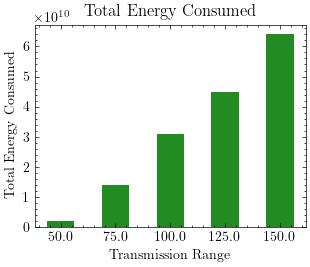

In [26]:
query = f"""SELECT sensornode.problemid, sensornode.simulatorid, sum(energyconsumed), simulator.transmissionrange, simulatortype FROM SensorNode inner join simulator on sensornode.simulatorid = simulator.simulatorid 
                    where simulator.interferencerange = 200 and simulator.transfertime = 120 and sensornode.problemid = 1 and simulator.simulatortype like 'Default%'
                    group by sensornode.problemid, sensornode.simulatorid
                    order by transmissionrange"""

x_axis = []
y = []
for row in cur.execute(query):
    print(row)
    y += [row[2]]
    x_axis += [row[3]]

fig, ax = plt.subplots()

x = np.arange(len(y))  # the label locations
width = 0.5  # the width of the bars

rects = ax.bar(x + width, y, width, color='forestgreen')
#ax.bar_label(rects, padding=3)

ax.set_ylabel("Total Energy Consumed")
ax.set_xlabel("Transmission Range")
ax.set_title("Total Energy Consumed")
ax.set_xticks(x + width, x_axis)
#ax.legend(bbox_to_anchor=(1.1, 1.05))

fig.savefig(f"Images/Energy-TransmissionRange.png", dpi=600)
#plt.close()

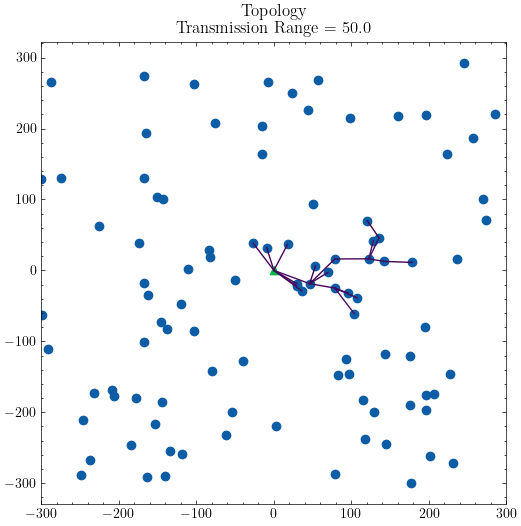

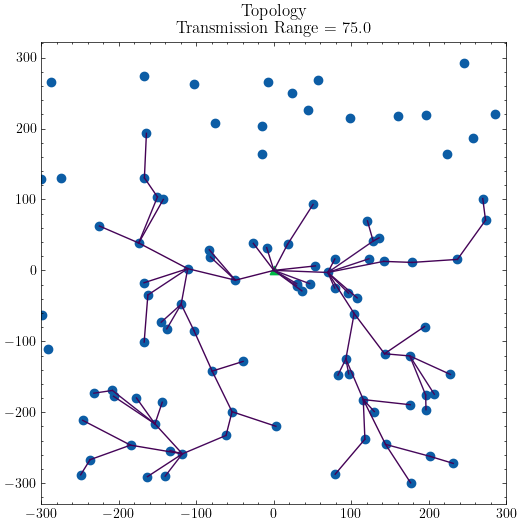

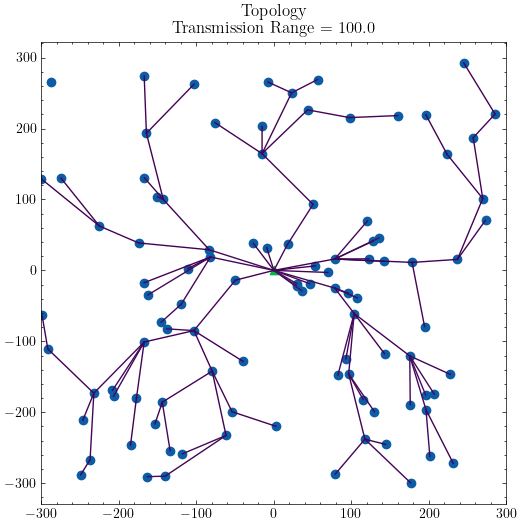

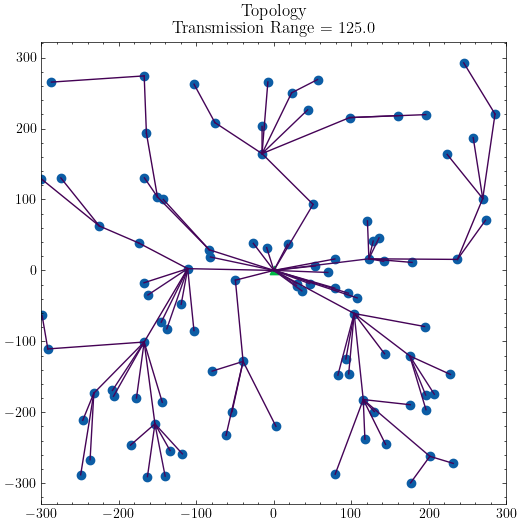

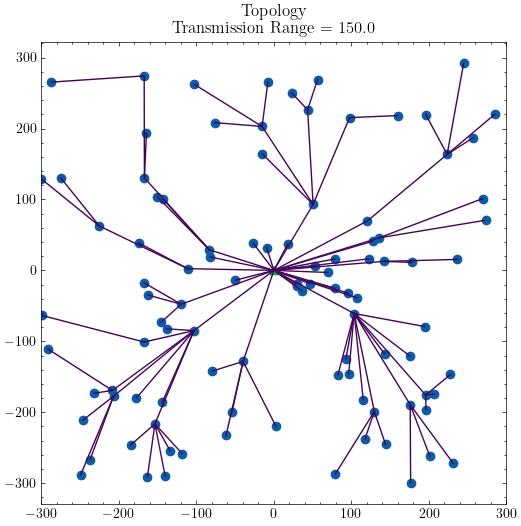

In [48]:
transmission_range_dict = {}
sn_location_dict = {}
# key : (problemid, simulatorid), value : (sensornodeid, posx, posy)
for row in cur.execute("SELECT sensornode.problemid, sensornode.simulatorid, sensornode.sensornodeid, posx, posy, temp.transmissionrange FROM SensorNode inner join (select simulator.transmissionrange, simulator.simulatorid, simulator.problemid from simulator where simulator.simulatorid in (select simulator.simulatorid from simulator where simulatorid = simulator.simulatorid and problemid = simulator.problemid group by simulator.transmissionrange order by random()) group by simulator.simulatorid) temp on temp.simulatorid = sensornode.simulatorid and temp.problemid = sensornode.problemid"):
    row = list(row)
    if (row[0], row[1]) not in sn_location_dict.keys():
        sn_location_dict[(row[0], row[1])] = []
        transmission_range_dict[(row[0], row[1])] = row[5]
    sn_location_dict[(row[0], row[1])].append((row[2], row[3], row[4]))    
    

key_random, val_random = random.choice(list(sn_location_dict.items()))
snid, posx, posy = map(list, zip(*val_random))

maxcolor = -1
sn_parent_dict = {}
# key : (problemid, simulatorid, sensornodeid), value : (parentid)
for row in cur.execute("SELECT problemid, simulatorid, sensornodeid, parent, color FROM SensorNode"):
    row = list(row)
    if (row[0], row[1], row[2]) not in sn_parent_dict.keys():
        sn_parent_dict[(row[0], row[1], row[2])] = []
    sn_parent_dict[(row[0], row[1], row[2])].append((row[3], row[4]))
    maxcolor = max(maxcolor, row[4])

cmap = plt.get_cmap('viridis')
sn_connection_dict = {}
# key : (problemid, simulatorid), value : [(posx_child, posy_child, posx_parent, posy_parent)]
for key in sn_location_dict.keys():
    if key not in sn_connection_dict.keys():
        sn_connection_dict[key] = []

    posx_child = None
    posy_child = None

    posx_parent = None
    posy_parent = None

    temp_tuples_list = map(list, zip(*sn_location_dict[key]))
    temp_tuples_list_list = list(temp_tuples_list)
    temp_tuples_list_list = sn_location_dict[key]
    for child_snid_tuple in temp_tuples_list_list:
        child_snid = child_snid_tuple[0]
        parent_snid = sn_parent_dict[(key[0], key[1], child_snid)][0][0]
        color = sn_parent_dict[(key[0], key[1], child_snid)][0][1]

        for i in range(len(temp_tuples_list_list)):
            if temp_tuples_list_list[i][0] == child_snid:
                posx_child = temp_tuples_list_list[i][1]
                posy_child = temp_tuples_list_list[i][2]
                break
        


        if parent_snid == -1:
            posx_parent = 0
            posy_parent = 0
        elif parent_snid == -2:
            continue
        else:
            for i in range(len(temp_tuples_list_list)):
                
                if temp_tuples_list_list[i][0] == parent_snid:
                    posx_parent = temp_tuples_list_list[i][1]
                    posy_parent = temp_tuples_list_list[i][2]
                    break

        sn_connection_dict[key].append((posx_child, posy_child, posx_parent, posy_parent, color))



for sn_connection_dict_i in sn_connection_dict.items():
    key, val = sn_connection_dict_i
    plt.figure(figsize=(6, 6))
    plt.xlim([-300, 300])
    plt.xlim([-300, 300])

    for aaa_tuple in val:
        plt.plot([aaa_tuple[0], aaa_tuple[2]], [aaa_tuple[1], aaa_tuple[3]], color=cmap(aaa_tuple[4]))

    plt.scatter(posx, posy)
    plt.scatter([0], [0], marker="^")
    plt.title(f"Topology\nTransmission Range = {transmission_range_dict[key]}")
    plt.savefig(f"Images/Topology-{transmission_range_dict[key]}.png")
    plt.show()
    plt.close()
